In [164]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
with open('names.txt','r') as h:
    words = [w.rstrip() for w in h.readlines()]

print(words[:8])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']
32033


In [166]:
chars = sorted(set(''.join(words)))
chars = ['.']+chars

#
# same result as two rows above as '.' is less than any [a-z] or [0-9]
#chars = sorted(set('.'.join(words)))

# same:
#chars = ['.']+[*chars]

N = len(chars)
print(f"\nTotal characters: {N=}\n")

stoi = { s:i for i,s in enumerate(chars)}
itos = { i:s for s,i in stoi.items()}

print(itos,'\n')

encode = lambda c : stoi[c]
decode = lambda i : itos[i]

print(encode('a'))
print(decode(1))


Total characters: N=27

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'} 

1
a


In [167]:
X, Y = [], []

block_size = 3
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = encode(ch)
        X.append(context)
        Y.append(ix)
        print(''.join(decode(i) for i in context), '--->', decode(ix))
        context = context[1:] + [ix]

        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [168]:
X.dtype, X.shape, Y.dtype, Y.shape

(torch.int64, torch.Size([32, 3]), torch.int64, torch.Size([32]))

In [169]:
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [170]:
torch.manual_seed(123)
C = torch .randn(27, 2)

In [171]:
print(C[5].numpy())
print(C[6].numpy(), '\n')
print(C[[5,6]].numpy(), '\n')
print(C[torch.tensor([5,6])].numpy())

[ 0.6983519 -1.4097229]
[0.17937961 1.895148  ] 

[[ 0.6983519  -1.4097229 ]
 [ 0.17937961  1.895148  ]] 

[[ 0.6983519  -1.4097229 ]
 [ 0.17937961  1.895148  ]]


In [172]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([ 0.6984, -1.4097])

In [173]:
print(torch.stack((C[5], C[6]), dim=0))

tensor([[ 0.6984, -1.4097],
        [ 0.1794,  1.8951]])


In [174]:
T56s = torch.stack((C[5], C[6]), dim=0) 
T56 = C[[5,6]]
print(torch.equal(T56,T56s))
T56 == T56s

True


tensor([[True, True],
        [True, True]])

In [175]:
# 
# just index by tensor of indices!!! 
#
print(C[X][[1,2]])
# 
# that was just the first two rows of C[X] to keep it short
#

tensor([[[ 0.3374, -0.1778],
         [ 0.3374, -0.1778],
         [ 0.6984, -1.4097]],

        [[ 0.3374, -0.1778],
         [ 0.6984, -1.4097],
         [ 0.9666, -1.1481]]])


In [176]:
print(C[X].shape)
#
# a bunch of 2-d vector embeddings indexed by X
#
print(X.shape)

torch.Size([32, 3, 2])
torch.Size([32, 3])


In [177]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [178]:
len(torch.unbind(emb,1)) # torch.unbind(emb, dim=1)

3

In [179]:
xx = torch.tensor(range(12)).reshape(3,4)
print(xx)
print(xx.shape)
print(torch.unbind(xx, dim=0))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
(tensor([0, 1, 2, 3]), tensor([4, 5, 6, 7]), tensor([ 8,  9, 10, 11]))


In [180]:
xx = torch.tensor(range(60)).reshape(3,4,5)
print(xx)
print(xx.shape, '\n')

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])
torch.Size([3, 4, 5]) 



In [181]:
print(torch.unbind(xx, dim=1)[0])

tensor([[ 0,  1,  2,  3,  4],
        [20, 21, 22, 23, 24],
        [40, 41, 42, 43, 44]])


In [182]:
xx[:,0,:]

tensor([[ 0,  1,  2,  3,  4],
        [20, 21, 22, 23, 24],
        [40, 41, 42, 43, 44]])

In [183]:
torch.unbind(xx, dim=1)[1]

tensor([[ 5,  6,  7,  8,  9],
        [25, 26, 27, 28, 29],
        [45, 46, 47, 48, 49]])

In [184]:
xx[:,1,:]

tensor([[ 5,  6,  7,  8,  9],
        [25, 26, 27, 28, 29],
        [45, 46, 47, 48, 49]])

In [185]:
#
# inefficient compared to view as cat will allocate new storage
#
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([32, 6])

In [186]:
W1 = torch.randn((6,100))

#
# bias vector (1 per neuron)
#
b1 = torch.randn(100)

In [187]:
emb.view((emb.shape[0],6))
emb.view(-1,6)

tensor([[ 0.3374, -0.1778,  0.3374, -0.1778,  0.3374, -0.1778],
        [ 0.3374, -0.1778,  0.3374, -0.1778,  0.6984, -1.4097],
        [ 0.3374, -0.1778,  0.6984, -1.4097,  0.9666, -1.1481],
        [ 0.6984, -1.4097,  0.9666, -1.1481,  0.9666, -1.1481],
        [ 0.9666, -1.1481,  0.9666, -1.1481, -0.3035, -0.5880],
        [ 0.3374, -0.1778,  0.3374, -0.1778,  0.3374, -0.1778],
        [ 0.3374, -0.1778,  0.3374, -0.1778, -0.6315, -2.8400],
        [ 0.3374, -0.1778, -0.6315, -2.8400,  0.4965, -1.5723],
        [-0.6315, -2.8400,  0.4965, -1.5723, -0.1690,  0.9178],
        [ 0.4965, -1.5723, -0.1690,  0.9178,  1.3111, -0.2199],
        [-0.1690,  0.9178,  1.3111, -0.2199, -0.1690,  0.9178],
        [ 1.3111, -0.2199, -0.1690,  0.9178, -0.3035, -0.5880],
        [ 0.3374, -0.1778,  0.3374, -0.1778,  0.3374, -0.1778],
        [ 0.3374, -0.1778,  0.3374, -0.1778, -0.3035, -0.5880],
        [ 0.3374, -0.1778, -0.3035, -0.5880,  1.3111, -0.2199],
        [-0.3035, -0.5880,  1.3111, -0.2

In [188]:
h = torch.tanh(emb.view((emb.shape[0],6)) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [189]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [190]:
logits = h @ W2 + b2
#
#  number of samples times number of outcomes (27 letters)
#
logits.shape

torch.Size([32, 27])

In [191]:
#
# variant:
#
#counts1 = torch.exp(logits)
counts = logits.exp()
counts = counts/torch.sum(counts, dim=1, keepdim=True)
print(counts.shape)
print(counts[0].sum())

torch.Size([32, 27])
tensor(1.0000)


In [192]:
counts[torch.arange(32), Y]

tensor([6.2853e-04, 1.7430e-11, 1.2537e-08, 9.1832e-10, 1.0705e-03, 1.4901e-06,
        2.5817e-11, 1.1903e-07, 4.1851e-07, 3.1531e-17, 2.7315e-10, 4.5835e-09,
        1.5925e-10, 4.1808e-06, 2.5429e-07, 6.8290e-02, 8.1018e-11, 6.5253e-05,
        3.3588e-10, 4.7065e-04, 3.8369e-10, 3.2624e-21, 1.2444e-07, 5.5174e-08,
        1.5604e-05, 1.6026e-04, 1.1157e-08, 3.3036e-08, 8.0063e-07, 4.7687e-11,
        4.5782e-05, 1.5546e-10])

In [193]:
#
#example of indexing:
#
counts[[1,2],[3,4]]

tensor([9.9974e-01, 1.4941e-09])

In [194]:
loss = -counts[torch.arange(32), Y].log().mean()
print(loss)

tensor(17.7495)


In [195]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((N, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, N), generator=g)
b2 = torch.randn(N, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [196]:
nsamples = len(Y)
print(f"\n{nsamples = }\n")
totalParam = sum(p.nelement() for p in parameters)
print(f"{totalParam = }\n")


nsamples = 32

totalParam = 3481



In [197]:
# embed X into the embedding space
emb = C[X]

# layer 1 (hidden) 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
#print(f"{h.shape = }")

# output layer
prob = F.softmax(h @ W2 + b2, dim=1)

# log-loss
loss = -prob[torch.arange(nsamples), Y].log().mean()
print(f"\n{loss = }")


loss = tensor(17.7697, grad_fn=<NegBackward0>)


In [198]:
#
# More like the original:
#
# emb = C[X]
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts/torch.sum(counts, dim=1, keepdim=True)
# nsamples = len(Y)
# loss = -prob[torch.arange(nsamples), Y].log().mean()
# print(f"{loss = }")


In [199]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(f"{loss = }")

loss = tensor(17.7697, grad_fn=<NllLossBackward0>)


In [200]:
prob[torch.arange(nsamples), Y]

tensor([1.5213e-14, 1.2830e-12, 1.9647e-08, 3.1758e-10, 5.6763e-12, 1.0823e-10,
        1.8821e-14, 1.1087e-08, 1.6134e-09, 2.1917e-03, 5.3863e-08, 3.1970e-04,
        2.0283e-10, 3.5710e-11, 6.2336e-07, 5.1704e-07, 1.4206e-01, 9.5657e-09,
        2.0670e-09, 2.5181e-02, 7.6846e-05, 2.8706e-12, 1.6961e-09, 5.6464e-15,
        4.4656e-03, 2.6851e-09, 3.5864e-05, 2.3389e-04, 1.6890e-09, 9.5614e-01,
        9.7404e-10, 2.1230e-12], grad_fn=<IndexBackward0>)

In [201]:
#
#  Apparently not setting grad to None can cause divergence:
#
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((N, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, N), generator=g)
b2 = torch.randn(N, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

Steps = 300
for step in range(Steps):
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    
#     for p in parameters:
#         p.grad = None
        
    loss.backward()
    
    if step % int(Steps/10) == 0:
        print(f"{step = }, loss = {loss.item()}")

    for p in parameters:
        p.data -= 0.1*p.grad

print(f"loss = {loss.item()}")

step = 0, loss = 17.76971435546875
step = 30, loss = 0.6320147514343262
step = 60, loss = 0.2750471830368042
step = 90, loss = 0.27505427598953247
step = 120, loss = 0.31967267394065857
step = 150, loss = 1.8348438739776611
step = 180, loss = 4.616419315338135
step = 210, loss = 10.78406810760498
step = 240, loss = 13.907838821411133
step = 270, loss = 25.122119903564453
loss = 45.83367156982422


In [202]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((N, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, N), generator=g)
b2 = torch.randn(N, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

Steps = 300
for step in range(Steps):
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    
    for p in parameters:
        p.grad = None
        
    loss.backward()
    
    if step % int(Steps/10) == 0:
        print(f"{step = }, loss = {loss.item()}")

    for p in parameters:
        p.data -= 0.1*p.grad

print(f"loss = {loss.item()}")

step = 0, loss = 17.76971435546875
step = 30, loss = 1.1367990970611572
step = 60, loss = 0.43213313817977905
step = 90, loss = 0.34906232357025146
step = 120, loss = 0.31282925605773926
step = 150, loss = 0.29326295852661133
step = 180, loss = 0.28327125310897827
step = 210, loss = 0.2772060036659241
step = 240, loss = 0.27310600876808167
step = 270, loss = 0.2701391577720642
loss = 0.2679549753665924


In [219]:
# max value per row:
logits.max(dim=1)

torch.return_types.max(
values=tensor([12.2507, 15.6167, 19.7251, 19.2065, 15.1653, 12.2507, 14.5368, 12.9834,
        14.6929, 16.7506, 14.3019, 19.3470, 12.2507, 15.2280, 15.6323, 18.4261,
        12.2507, 15.1299, 13.3646, 15.2784, 17.2229, 14.2677,  9.4187,  9.3573,
        14.6208, 12.2507, 14.8763, 15.4997, 11.8749, 15.2119, 17.4153, 14.0490],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [222]:
print(Y)
torch.abs(Y-logits.max(dim=1).indices)

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])


tensor([14,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0, 10,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [206]:
for ind in Y[torch.abs(Y-logits.max(dim=1).indices) > 0 ]:
    print(decode(ind.item()))

e
o
a
i


In [250]:
#
# Exploring ambiguity:
#     sort by first 3 letters as this is our feature span
#
with open('ambiguous.txt','r') as h:
    ambig = [line.rstrip() for line in  h.readlines()]

ambig = sorted(ambig, key = lambda s: s[:3]+s[9])

print("\n".join(ambig))

... ---> a
... ---> e
... ---> i
... ---> o
... ---> s
..a ---> v
..e ---> m
..i ---> s
..o ---> l
..s ---> o
.av ---> a
.em ---> m
.is ---> a
.ol ---> i
.so ---> p
abe ---> l
ava ---> .
bel ---> l
ell ---> a
emm ---> a
hia ---> .
isa ---> b
ivi ---> a
liv ---> i
lla ---> .
mma ---> .
oli ---> v
oph ---> i
phi ---> a
sab ---> e
sop ---> h
via ---> .


In [229]:
F.one_hot(torch.tensor(0), num_classes=27).float() @ C

tensor([ 2.2874, -0.3045], grad_fn=<SqueezeBackward3>)

In [255]:
#
#  This is what is predicted for '...' input (instead of other (e,o,a,i) possibilities)
#     this is why loss cannot become 0
#     overfitting (exact prediction) otherwise
#
ind = torch.max(torch.tanh(C[[0,0,0]].view(-1,6) @ W1 + b1) @ W2 + b2, dim=1).indices
print(decode(ind.item()))
#
#  This was just the forward pass calculation for '...', which is encoded as [0,0,0]
#

s


In [259]:
X, Y = [], []

block_size = 3
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = encode(ch)
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

        
X = torch.tensor(X)
Y = torch.tensor(Y)

print(f"{X.shape = }")

X.shape = torch.Size([228146, 3])


In [341]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((N, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, N), generator=g)
b2 = torch.randn(N, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

Steps = 20

problem_size = C[X].shape
print(f"{problem_size = }\n")

for step in range(Steps):
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    
    for p in parameters:
        p.grad = None
        
    loss.backward()
    
    if step % int(Steps/10) == 0:
        print(f"{step = }, loss = {loss.item()}")

    for p in parameters:
        p.data -= 0.1*p.grad

print(f"loss = {loss.item()}")

problem_size = torch.Size([228146, 3, 2])

step = 0, loss = 19.505229949951172
step = 2, loss = 15.776532173156738
step = 4, loss = 14.002605438232422
step = 6, loss = 12.57991886138916
step = 8, loss = 11.47049331665039
step = 10, loss = 10.709587097167969
step = 12, loss = 10.127808570861816
step = 14, loss = 9.614501953125
step = 16, loss = 9.148944854736328
step = 18, loss = 8.722230911254883
loss = 8.521748542785645


In [305]:
def model_init():
    g = torch.Generator().manual_seed(2147483647)

    C = torch.randn((N, 2), generator=g)

    W1 = torch.randn((6, 100), generator=g)
    b1 = torch.randn(100, generator=g)

    W2 = torch.randn((100, N), generator=g)
    b2 = torch.randn(N, generator=g)

    parameters = [C, W1, b1, W2, b2]
    for p in parameters:
        p.requires_grad = True
        
    return parameters

In [554]:
#
#  With minibatches
#

C, W1, b1, W2, b2 = parameters = model_init()

Steps = 100000

ix = torch.randint(0, X.shape[0], (32,))
print(f"{ix.shape = }\n")
print(f"{X.shape = }\n")
problem_size = C[X[ix]].shape
print(f"{problem_size = }\n")

for step in range(Steps):
    
    # assuming we have more than 32 samples, 
    # select a random set of indices of size 32:
    ix = torch.randint(0, X.shape[0], (32,)) # (32, 3, 2)
    # this is done to increase speed as the gradient calculation 
    # is only done on the minibatch:
    #
    #  emb is much smaller (32x6), (32x3x2), actually
    #
    emb = C[X[ix]]    
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # (27, 1)
    
    for p in parameters:
        p.grad = None
        
    loss.backward()
    
    if step % int(Steps/10) == 0:
        print(f"{step = }, loss = {loss.item()}")

    for p in parameters:
        p.data -= 0.1*p.grad
    
print(f"loss = {loss.item()}")

ix.shape = torch.Size([32])

X.shape = torch.Size([228146, 3])

problem_size = torch.Size([32, 3, 2])

step = 0, loss = 2.7358171939849854
step = 100, loss = 2.2971091270446777
step = 200, loss = 2.510371685028076
step = 300, loss = 2.046825885772705
step = 400, loss = 2.3307857513427734
step = 500, loss = 2.4067234992980957
step = 600, loss = 2.7482686042785645
step = 700, loss = 2.4660470485687256
step = 800, loss = 2.726320266723633
step = 900, loss = 2.325817346572876
loss = 2.2203707695007324


In [567]:
# emb = C[X]
# h = torch.tanh(emb.view(-1,6) @ W1 + b1)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, Y)
# print(loss)
loss = F.cross_entropy(torch.tanh(C[X].view(-1,6) @ W1 + b1) @ W2 + b2, Y)
print(loss)

tensor(2.5108, grad_fn=<NllLossBackward0>)


In [571]:
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [580]:
#
#  With minibatches
#

C, W1, b1, W2, b2 = parameters = model_init()

Steps = 1000

ix = torch.randint(0, X.shape[0], (32,))
print(f"{ix.shape = }\n")
print(f"{X.shape = }\n")
problem_size = C[X[ix]].shape
print(f"{problem_size = }\n")

lri = []
lossi = []
for step in range(Steps):
    
    # assuming we have more than 32 samples, 
    # select a random set of indices of size 32:
    ix = torch.randint(0, X.shape[0], (32,)) # (32, 3, 2)
    # this is done to increase speed as the gradient calculation 
    # is only done on the minibatch:
    #
    #  emb is much smaller (32x6), (32x3x2), actually
    #
    emb = C[X[ix]]    
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # (27, 1)
    
    for p in parameters:
        p.grad = None
        
    loss.backward()
    
    if step % int(Steps/10) == 0:
        print(f"{step = }, loss = {loss.item()}")

    lr = lrs[step]
    for p in parameters:
        p.data -= lr*p.grad
    lri.append(lre[step])
    lossi.append(loss.item())
    
print(f"loss = {loss.item()}")

ix.shape = torch.Size([32])

X.shape = torch.Size([228146, 3])

problem_size = torch.Size([32, 3, 2])

step = 0, loss = 17.4433536529541
step = 100, loss = 17.128036499023438
step = 200, loss = 13.343046188354492
step = 300, loss = 12.948945999145508
step = 400, loss = 7.260203838348389
step = 500, loss = 4.799441814422607
step = 600, loss = 2.6984164714813232
step = 700, loss = 3.116445541381836
step = 800, loss = 3.2241733074188232
step = 900, loss = 4.955418586730957
loss = 8.027120590209961


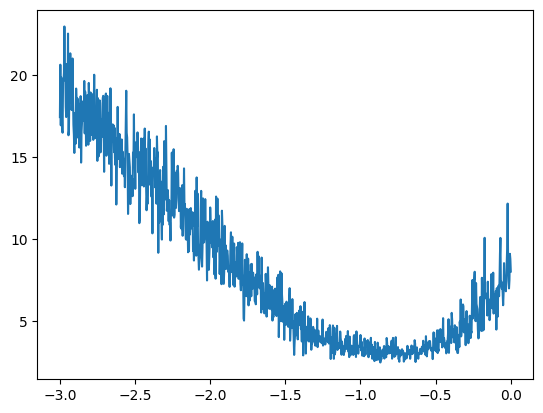

In [581]:
plt.plot(lri, lossi)

In [579]:
#
#  With minibatches
#

#C, W1, b1, W2, b2 = parameters = model_init()

Steps = 100000

ix = torch.randint(0, X.shape[0], (32,))
print(f"{ix.shape = }\n")
print(f"{X.shape = }\n")
problem_size = C[X[ix]].shape
print(f"{problem_size = }\n")

for step in range(Steps):
    
    # assuming we have more than 32 samples, 
    # select a random set of indices of size 32:
    ix = torch.randint(0, X.shape[0], (32,)) # (32, 3, 2)
    # this is done to increase speed as the gradient calculation 
    # is only done on the minibatch:
    #
    #  emb is much smaller (32x6), (32x3x2), actually
    #
    emb = C[X[ix]]    
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # (27, 1)
    
    for p in parameters:
        p.grad = None
        
    loss.backward()
    
    if step % int(Steps/10) == 0:
        print(f"{step = }, loss = {loss.item()}")
    lr = 0.01
    for p in parameters:
        p.data -= lr*p.grad
    
print(f"loss = {loss.item()}")

ix.shape = torch.Size([32])

X.shape = torch.Size([228146, 3])

problem_size = torch.Size([32, 3, 2])

step = 0, loss = 2.5828747749328613
step = 10000, loss = 2.373711109161377
step = 20000, loss = 2.1053831577301025
step = 30000, loss = 2.1323249340057373
step = 40000, loss = 2.2444777488708496
step = 50000, loss = 2.3498728275299072
step = 60000, loss = 2.004650592803955
step = 70000, loss = 2.1323673725128174
step = 80000, loss = 1.9687038660049438
step = 90000, loss = 2.1023547649383545
loss = 2.3225154876708984
